No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


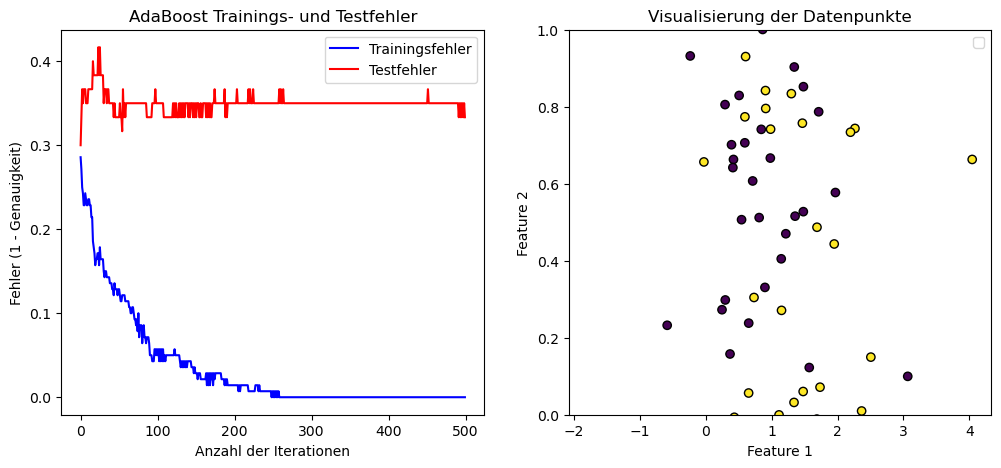

In [115]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Datensatz mit zufälliger Verteilung und geringer Klassifizierbarkeit erstellen
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.4, random_state=1)

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost-Modell initialisieren
model = AdaBoostClassifier(n_estimators=500, random_state=42)

# Trainings- und Testfehler aufzeichnen
train_errors, test_errors = [], []

# Modell iterativ trainieren und Fehler aufzeichnen
for i in range(1, 501):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

# Fehler über Iterationen plotten
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_errors, label='Trainingsfehler', color='blue')
plt.plot(test_errors, label='Testfehler', color='red')
plt.title('AdaBoost Trainings- und Testfehler')
plt.xlabel('Anzahl der Iterationen')
plt.ylabel('Fehler (1 - Genauigkeit)')
plt.legend()

# Datenvisualisierung
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Visualisierung der Datenpunkte")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.ylim([0, 1])  # Setzt die Grenzen der y-Achse auf 0 bis 1
plt.legend()

# Plot speichern
plt.savefig('../Images/AdaBoost_Error_Plot.png')

/var/folders/pl/b_47jr3d1pg26wgrxk9jmykr0000gn/T/ipykernel_4692/2385046048.py:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


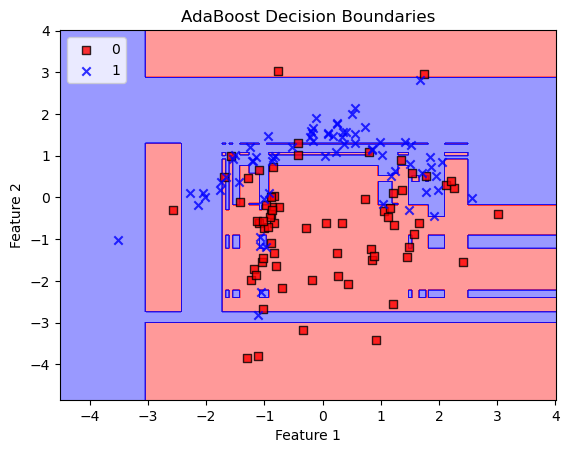

In [117]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Datensatz erstellen
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, flip_y=0.4, random_state=1)

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost-Modell initialisieren und trainieren
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# Funktion zum Plotten der Entscheidungsgrenzen
def plot_decision_boundaries(X, y, model, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

# Entscheidungsgrenzen mit Trainingsdaten plotten
plot_decision_boundaries(X_train, y_train, ada_clf)
plt.title('AdaBoost Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, iteration, ax):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"Entscheidungsgrenzen nach {iteration} Iterationen")

# Datensatz erstellen
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.4, random_state=1)

# Datensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost-Modell initialisieren
model_250 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=250, random_state=42)
model_500 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, random_state=42)

# Modelle trainieren
model_250.fit(X_train, y_train)
model_500.fit(X_train, y_train)

# Plots erstellen
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundaries(X_train, y_train, model_250, 250, axes[0])
plot_decision_boundaries(X_train, y_train, model_500, 500, axes[1])

plt.tight_layout()
plt.savefig('../Images/AdaBoost_Decision_Boundaries.png')
plt.show()
